In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
import csv
from tqdm import tqdm

import tensorflow as tf
from tensorflow import shape,math
from tensorflow.keras import Input,layers,Model
from tensorflow.keras.losses import mse,binary_crossentropy
from tensorflow.keras.utils import plot_model

import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
# import os
# import pandas as pd
# import numpy as np

# output_dir = os.path.join(".", "output")  # Path to the output directory
# subdirs = [f.path for f in os.scandir(output_dir) if f.is_dir()]
# subdirs.sort()

# # Create an empty 3D array to store the combined data
# combined_arr = np.empty((len(subdirs), 999, 10))

# # Loop through each subdirectory and load the CSV files
# for i, subdir in enumerate(subdirs):
#     action_filename = os.path.join(subdir, "action.csv")
#     obs_filename = os.path.join(subdir, "obs.csv")

#     # Load the action and obs CSV files
#     action_df = pd.read_csv(action_filename)
#     obs_df = pd.read_csv(obs_filename)

#     # Concatenate the DataFrames horizontally
#     combined_data = pd.concat([action_df, obs_df], axis=1)

#     # Convert combined_data to a 3D array and assign it to combined_arr
#     combined_arr[i] = np.reshape(combined_data.values, (999, 10))

# # Print the shape of combined_arr
# print(combined_arr.shape)


In [4]:
# flattened_arr = combined_arr.reshape(10000, 9990)

In [5]:
# flattened_arr.shape

In [6]:
# import torch

# combined_df = np.array(combined_arr)
# combined_tensor = torch.from_numpy(combined_df)
# flattened_tensor = combined_tensor.flatten(start_dim=1)

In [7]:
# # Rename dimensions to 'Seed' and 'Data'
# flattened_tensor.names = ("Seed", "Data")

# # Now flattened_tensor will have dimensions named 'Seed' and 'Data'
# print(flattened_tensor.shape)  # Output: torch.Size([10000, 9990])
# print(flattened_tensor)

In [8]:
# len(flattened_tensor)

In [9]:
import os
import pandas as pd
import numpy as np

output_dir = os.path.join(".", "output_bw")  # Path to the output directory
subdirs = [f.path for f in os.scandir(output_dir) if f.is_dir()]
subdirs.sort()

# Create an empty 3D array to store the combined data
combined_arr = np.empty((len(subdirs), 1000, 2))

# Loop through each subdirectory and load the CSV files
for i, subdir in enumerate(subdirs):
    action_filename = os.path.join(subdir, "action.csv")

    # Load the action and obs CSV files
    action_df = pd.read_csv(action_filename,  header=None)

    # Convert combined_data to a 3D array and assign it to combined_arr
    combined_arr[i-1] = np.reshape(action_df.values, (1000, 2))

# Print the shape of combined_arr
print(combined_arr.shape)

(10000, 1000, 2)


In [10]:
combined_df = np.array(combined_arr)

In [11]:
from sklearn.preprocessing import MinMaxScaler
## 정규화하기

# Flatten the combined_arr to 2D
flattened_arr = combined_arr.reshape(-1, combined_arr.shape[-1])

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler and transform the data
normalized_arr = scaler.fit_transform(flattened_arr)

# Reshape the normalized data back to the original shape
normalized_arr = normalized_arr.reshape(combined_arr.shape)

# Print the shape of normalized_arr
print(normalized_arr.shape)

(10000, 1000, 2)


In [12]:
combined_df = np.array(combined_arr)

In [13]:
## 정규화 다시 되돌리기

# Flatten the normalized_arr to 2D
flattened_normalized_arr = normalized_arr.reshape(-1, normalized_arr.shape[-1])

# Use the inverse_transform method to transform the data back to its original state
original_arr = scaler.inverse_transform(flattened_normalized_arr)

# Reshape the original data back to the original shape
original_arr = original_arr.reshape(combined_arr.shape)

# Print the shape of original_arr
print(original_arr.shape)


(10000, 1000, 2)


In [14]:
print(np.allclose(original_arr, combined_arr))

True


# 정규화해서 해보기

In [15]:
import torch

combined_df = np.array(combined_arr)
combined_tensor = torch.from_numpy(combined_df)
normalized_tensor = torch.from_numpy(normalized_arr)

====> Epoch: 1 Average loss: 0.003773273519107274, Recon Loss: 0.0019247711769172123, KL Div: 0.0018485023123877389
====> Epoch: 2 Average loss: 0.003031910300254822, Recon Loss: 0.0019233341344765255, KL Div: 0.001108576157263347
====> Epoch: 3 Average loss: 0.0024523484195981705, Recon Loss: 0.0019208733780043466, KL Div: 0.0005314750245639257
====> Epoch: 4 Average loss: 0.002059516830103738, Recon Loss: 0.0019180270220552171, KL Div: 0.00014148979953357152
====> Epoch: 5 Average loss: 0.0019512378403118678, Recon Loss: 0.0019147787179265704, KL Div: 3.6459122385297505e-05
====> Epoch: 6 Average loss: 0.0019287179495607104, Recon Loss: 0.0019109950874532972, KL Div: 1.7722862107413155e-05
====> Epoch: 7 Average loss: 0.0019199065480913434, Recon Loss: 0.0019066402571541923, KL Div: 1.3266290937151228e-05
====> Epoch: 8 Average loss: 0.0019125272078173502, Recon Loss: 0.0019015348766531263, KL Div: 1.0992331164223808e-05
====> Epoch: 9 Average loss: 0.001904874997479575, Recon Loss: 

====> Epoch: 71 Average loss: 0.0007144172596079963, Recon Loss: 0.0007137712644679205, KL Div: 6.459951400756835e-07
====> Epoch: 72 Average loss: 0.0007141514590808324, Recon Loss: 0.000713521169764655, KL Div: 6.302893161773682e-07
====> Epoch: 73 Average loss: 0.0007135293845619475, Recon Loss: 0.0007129144434417997, KL Div: 6.149411201477051e-07
====> Epoch: 74 Average loss: 0.0007125403987509863, Recon Loss: 0.000711944905774934, KL Div: 5.954929760524205e-07
====> Epoch: 75 Average loss: 0.0007113292621714728, Recon Loss: 0.0007107495431389127, KL Div: 5.79719032560076e-07
====> Epoch: 76 Average loss: 0.0007105500421353748, Recon Loss: 0.0007099833850349699, KL Div: 5.666571004050119e-07
====> Epoch: 77 Average loss: 0.0007101066772426878, Recon Loss: 0.0007095547297171184, KL Div: 5.519475255693708e-07
====> Epoch: 78 Average loss: 0.0007099241401468004, Recon Loss: 0.0007093846329620906, KL Div: 5.395071847098214e-07
====> Epoch: 79 Average loss: 0.0007094660252332688, Recon 

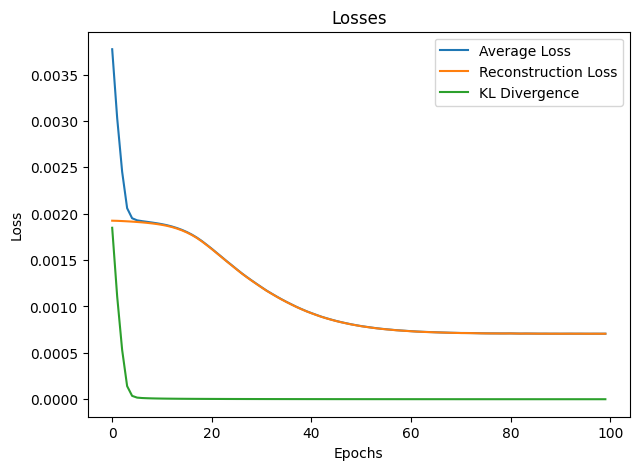

In [32]:
class Encoder(nn.Module):
    def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(Encoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3, latent_dim * 2)  # mean and variance
        )

    def forward(self, x):
        h = self.encoder(x)
        mu, log_var = h.chunk(2, dim=1)
        return mu, log_var


class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_shape):
        super(Decoder, self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, output_shape),
        )

    def forward(self, z):
        x_reconstructed = self.decoder(z)
        return x_reconstructed


class VAE(nn.Module):
    def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(VAE, self).__init__()

        self.encoder = Encoder(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, input_shape)

    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var / 2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, log_var = self.encoder(x)
        z = self.reparameterize(mu, log_var)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, log_var

    
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import random_split

# Assuming combined_tensor is your data
# Convert the data to float32
dataset = TensorDataset(normalized_tensor.float())

# Define the data loader
batch_size = 256  # adjust as necessary

# Split data into train, validation, and test
train_size = int(0.7 * len(dataset))  # 70% for training
valid_size = int(0.15 * len(dataset))  # 15% for validation
test_size = len(dataset) - train_size - valid_size  # 15% for testing

train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Hyperparameters
input_shape = combined_tensor.shape[1] * combined_tensor.shape[2]  # modify this to match your data
hidden_dim1 = 24  # modify as needed
hidden_dim2 = 48  # modify as needed
hidden_dim3 = 128  # modify as needed
latent_dim = 2  # modify as needed
lr = 5e-5  # learning rate
n_epochs = 100  # modify as needed
beta = 1
    
# Model, optimizer, and loss function
model = VAE(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)

optimizer = optim.RAdam(model.parameters(), lr=lr)  # Make sure you're using the correct optimizer
loss_fn = nn.MSELoss()  # And the correct loss function


def train(epoch, model, optimizer, loss_fn, train_loader):
    model.train()
    train_loss = 0
    total_recon_loss = 0
    total_kl_div = 0
    for i, batch in enumerate(train_loader):  # using train_loader instead of dataloader
        batch_data = batch[0]  # get the data from the batch
        
        optimizer.zero_grad()

        # Flatten the data
        batch_data = batch_data.view(batch_data.size(0), -1)

        reconstructed_batch, mu, log_var = model(batch_data)

        # Loss: reconstruction loss + KL divergence
        recon_loss = loss_fn(reconstructed_batch, batch_data)
        kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        loss = recon_loss + beta*kl_divergence

        loss.backward()
        train_loss += loss.item()
        total_recon_loss += recon_loss.item()
        total_kl_div += kl_divergence.item()
        optimizer.step()

    avg_loss = train_loss / len(train_loader.dataset)
    avg_recon_loss = total_recon_loss / len(train_loader.dataset)
    avg_kl_div = total_kl_div / len(train_loader.dataset)
    print(f'====> Epoch: {epoch} Average loss: {avg_loss}, Recon Loss: {avg_recon_loss}, KL Div: {avg_kl_div}')

    return avg_loss, avg_recon_loss, avg_kl_div

    
import matplotlib.pyplot as plt

# Lists to store losses for each epoch
avg_losses = []
avg_recon_losses = []
avg_kl_divs = []

# Training
for epoch in range(1, n_epochs + 1):
    avg_loss, avg_recon_loss, avg_kl_div = train(epoch, model, optimizer, loss_fn, train_loader)
    avg_losses.append(avg_loss)
    avg_recon_losses.append(avg_recon_loss)
    avg_kl_divs.append(avg_kl_div)

# Plot the losses
plt.figure(figsize=(7,5))
plt.plot(avg_losses, label='Average Loss')
plt.plot(avg_recon_losses, label='Reconstruction Loss')
plt.plot(avg_kl_divs, label='KL Divergence')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [33]:
def compare_data(data):

    # Get the first row from the dataframe
    first_row = data.iloc[0]

    # Reshape it to (1000, 10)
    reshaped_array = np.reshape(first_row.values, (1000, 2))

    # Convert it back to a dataframe
    reshaped_df = pd.DataFrame(reshaped_array)
    recon_combined_tensor = torch.tensor(reshaped_df.values)
    return recon_combined_tensor

In [37]:
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            batch_data = batch[0]  # get the data from the batch
            batch_data = batch_data.view(batch_data.size(0), -1)  # flatten the data
            reconstructed_batch, _, _ = model(batch_data)  # get reconstructed data from the model

            # Convert tensors to numpy arrays for use in pandas
            original_data = batch_data.detach().cpu().numpy()
            reconstructed_data = reconstructed_batch.detach().cpu().numpy()

            # Convert to dataframes
            original_df = pd.DataFrame(original_data)
            reconstructed_df = pd.DataFrame(reconstructed_data)

            if i == 0:  # for the first iteration, create the dataframes
                all_original_df = original_df
                all_reconstructed_df = reconstructed_df
            else:  # for subsequent iterations, append to the existing dataframes
                all_original_df = pd.concat([all_original_df, original_df])
                all_reconstructed_df = pd.concat([all_reconstructed_df, reconstructed_df])
    
    return all_original_df, all_reconstructed_df

# Call the function after training
original_df, reconstructed_df = test_model(model, test_loader)

# 두 데이터 비교

# Flatten the tensors
oriori = compare_data(original_df)
reconrecon = compare_data(reconstructed_df)

# Calculate the Euclidean distance
euclidean_distance = torch.norm(oriori.flatten() - reconrecon.flatten())


print(euclidean_distance)


tensor(16.4960)


In [35]:
## 정규화 다시 되돌리기

reconstructed_arr = np.array(reconrecon)

# Flatten the normalized_arr to 2D
flattened_normalized_arr = reconstructed_arr.reshape(-1, normalized_arr.shape[-1])

# Use the inverse_transform method to transform the data back to its original state
original_arr = scaler.inverse_transform(flattened_normalized_arr)

# Reshape the original data back to the original shape
original_arr = original_arr.reshape(reconstructed_arr.shape)

# Print the shape of original_arr
print(original_arr.shape)
original_df = pd.DataFrame(original_arr)

original_df.shape

replay(original_df)

(1000, 2)
0   -0.484255
1   -0.788141
Name: 0, dtype: float32
Creating window glfw


/opt/homebrew/Caskroom/miniconda/base/envs/firstenv/lib/python3.11/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment Swimmer-v3 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/firstenv/lib/python3.11/site-packages/gym/envs/mujoco/mujoco_env.py:190: UserWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/firstenv/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


0   -0.909873
1   -0.863864
Name: 1, dtype: float32
0   -1.008772
1   -0.980673
Name: 2, dtype: float32
0   -0.989683
1   -0.950144
Name: 3, dtype: float32
0   -0.995698
1   -0.755139
Name: 4, dtype: float32
0   -0.984217
1   -0.319867
Name: 5, dtype: float32
0   -0.730874
1    0.248128
Name: 6, dtype: float32
0    0.130658
1    0.781350
Name: 7, dtype: float32
0    0.849532
1    0.956947
Name: 8, dtype: float32
0    1.010494
1    0.981441
Name: 9, dtype: float32
0    0.985328
1    1.002628
Name: 10, dtype: float32
0    0.753276
1    1.005339
Name: 11, dtype: float32
0    1.001977
1    0.986301
Name: 12, dtype: float32
0    0.986612
1    0.990329
Name: 13, dtype: float32
0    1.004540
1    0.979083
Name: 14, dtype: float32
0    0.983889
1    0.984787
Name: 15, dtype: float32
0    0.980018
1    0.986278
Name: 16, dtype: float32
0    0.824993
1    0.921744
Name: 17, dtype: float32
0    0.918155
1    0.846088
Name: 18, dtype: float32
0    1.009953
1    0.722868
Name: 19, dtype: float32
0 

0    0.957255
1    0.775210
Name: 162, dtype: float32
0    0.890340
1    0.671258
Name: 163, dtype: float32
0    0.749055
1    0.578171
Name: 164, dtype: float32
0    0.683782
1    0.463495
Name: 165, dtype: float32
0    0.537984
1    0.324083
Name: 166, dtype: float32
0    0.458273
1    0.199936
Name: 167, dtype: float32
0    0.350935
1    0.044069
Name: 168, dtype: float32
0    0.191328
1   -0.088406
Name: 169, dtype: float32
0    0.010452
1   -0.237756
Name: 170, dtype: float32
0   -0.143832
1   -0.368988
Name: 171, dtype: float32
0   -0.291569
1   -0.502893
Name: 172, dtype: float32
0   -0.384493
1   -0.596585
Name: 173, dtype: float32
0   -0.528682
1   -0.703018
Name: 174, dtype: float32
0   -0.658444
1   -0.793038
Name: 175, dtype: float32
0   -0.740057
1   -0.859446
Name: 176, dtype: float32
0   -0.845529
1   -0.886270
Name: 177, dtype: float32
0   -0.882045
1   -0.869580
Name: 178, dtype: float32
0   -0.907193
1   -0.825925
Name: 179, dtype: float32
0   -0.861892
1   -0.756593


0   -0.351564
1   -0.331665
Name: 321, dtype: float32
0   -0.312215
1   -0.326788
Name: 322, dtype: float32
0   -0.344276
1   -0.347638
Name: 323, dtype: float32
0   -0.378583
1   -0.350606
Name: 324, dtype: float32
0   -0.393889
1   -0.339910
Name: 325, dtype: float32
0   -0.377203
1   -0.312750
Name: 326, dtype: float32
0   -0.336167
1   -0.273614
Name: 327, dtype: float32
0   -0.296245
1   -0.244824
Name: 328, dtype: float32
0   -0.290280
1   -0.141701
Name: 329, dtype: float32
0   -0.265469
1   -0.047479
Name: 330, dtype: float32
0   -0.155994
1    0.104695
Name: 331, dtype: float32
0    0.012499
1    0.192148
Name: 332, dtype: float32
0    0.126829
1    0.244941
Name: 333, dtype: float32
0    0.236932
1    0.291293
Name: 334, dtype: float32
0    0.266116
1    0.287691
Name: 335, dtype: float32
0    0.299488
1    0.295880
Name: 336, dtype: float32
0    0.311202
1    0.276620
Name: 337, dtype: float32
0    0.338804
1    0.303900
Name: 338, dtype: float32
0    0.299238
1    0.290206


0    0.079114
1    0.086461
Name: 480, dtype: float32
0    0.051343
1    0.066561
Name: 481, dtype: float32
0    0.053199
1    0.064867
Name: 482, dtype: float32
0    0.086516
1    0.058966
Name: 483, dtype: float32
0    0.098311
1    0.044793
Name: 484, dtype: float32
0    0.068053
1    0.034343
Name: 485, dtype: float32
0    0.055915
1    0.045066
Name: 486, dtype: float32
0    0.020485
1    0.036851
Name: 487, dtype: float32
0    0.030802
1    0.051803
Name: 488, dtype: float32
0    0.037665
1    0.056252
Name: 489, dtype: float32
0    0.072666
1    0.071262
Name: 490, dtype: float32
0    0.100408
1    0.066174
Name: 491, dtype: float32
0    0.112986
1    0.044131
Name: 492, dtype: float32
0    0.088651
1   -0.027036
Name: 493, dtype: float32
0    0.009021
1   -0.056285
Name: 494, dtype: float32
0   -0.071777
1   -0.051478
Name: 495, dtype: float32
0   -0.102744
1   -0.053773
Name: 496, dtype: float32
0   -0.067555
1   -0.046237
Name: 497, dtype: float32
0   -0.055835
1   -0.056493


0    0.001000
1    0.013921
Name: 633, dtype: float32
0    0.013748
1    0.017717
Name: 634, dtype: float32
0    0.033164
1    0.081938
Name: 635, dtype: float32
0    0.083340
1    0.068161
Name: 636, dtype: float32
0    0.130684
1    0.098334
Name: 637, dtype: float32
0    0.080632
1    0.051304
Name: 638, dtype: float32
0    0.052596
1    0.006060
Name: 639, dtype: float32
0   -0.014182
1   -0.018625
Name: 640, dtype: float32
0   -0.005424
1   -0.040138
Name: 641, dtype: float32
0   -0.035756
1   -0.017130
Name: 642, dtype: float32
0   -0.035428
1   -0.024074
Name: 643, dtype: float32
0   -0.030933
1   -0.002542
Name: 644, dtype: float32
0   -0.015581
1    0.001444
Name: 645, dtype: float32
0    0.007661
1    0.012712
Name: 646, dtype: float32
0    0.032078
1    0.000151
Name: 647, dtype: float32
0    0.005081
1   -0.003081
Name: 648, dtype: float32
0   -0.011176
1   -0.013128
Name: 649, dtype: float32
0   -0.005990
1   -0.064738
Name: 650, dtype: float32
0    0.007801
1   -0.094369


0   -0.023935
1   -0.075475
Name: 790, dtype: float32
0   -0.025649
1   -0.074541
Name: 791, dtype: float32
0   -0.059761
1   -0.113222
Name: 792, dtype: float32
0   -0.072860
1   -0.140721
Name: 793, dtype: float32
0   -0.110148
1   -0.137881
Name: 794, dtype: float32
0   -0.169972
1   -0.159660
Name: 795, dtype: float32
0   -0.191390
1   -0.166725
Name: 796, dtype: float32
0   -0.185122
1   -0.136248
Name: 797, dtype: float32
0   -0.187503
1   -0.109602
Name: 798, dtype: float32
0   -0.121745
1   -0.060184
Name: 799, dtype: float32
0   -0.069224
1   -0.009449
Name: 800, dtype: float32
0   -0.036397
1    0.030535
Name: 801, dtype: float32
0    0.014001
1    0.034068
Name: 802, dtype: float32
0    0.009470
1    0.037773
Name: 803, dtype: float32
0    0.017741
1    0.033621
Name: 804, dtype: float32
0    0.017678
1    0.033927
Name: 805, dtype: float32
0    0.009897
1    0.001897
Name: 806, dtype: float32
0    0.023001
1    0.047819
Name: 807, dtype: float32
0    0.019856
1    0.065743


0    0.013717
1    0.058705
Name: 948, dtype: float32
0    0.006194
1    0.105153
Name: 949, dtype: float32
0    0.080880
1    0.176313
Name: 950, dtype: float32
0    0.133232
1    0.210589
Name: 951, dtype: float32
0    0.201433
1    0.236357
Name: 952, dtype: float32
0    0.230836
1    0.219956
Name: 953, dtype: float32
0    0.234634
1    0.183025
Name: 954, dtype: float32
0    0.216549
1    0.155610
Name: 955, dtype: float32
0    0.183544
1    0.148427
Name: 956, dtype: float32
0    0.187217
1    0.113309
Name: 957, dtype: float32
0    0.132531
1    0.083812
Name: 958, dtype: float32
0    0.121568
1    0.081079
Name: 959, dtype: float32
0    0.080609
1    0.045962
Name: 960, dtype: float32
0    0.094245
1    0.023884
Name: 961, dtype: float32
0    0.067383
1    0.045457
Name: 962, dtype: float32
0    0.040905
1   -0.000416
Name: 963, dtype: float32
0    0.04825
1   -0.02028
Name: 964, dtype: float32
0    0.010986
1   -0.061302
Name: 965, dtype: float32
0   -0.015891
1   -0.081853
Na

In [36]:
## 정규화 오리지날 데이터 다시 되돌리기

reconstructed_arr = np.array(oriori)

# Flatten the normalized_arr to 2D
flattened_normalized_arr = reconstructed_arr.reshape(-1, normalized_arr.shape[-1])

# Use the inverse_transform method to transform the data back to its original state
original_arr = scaler.inverse_transform(flattened_normalized_arr)

# Reshape the original data back to the original shape
original_arr = original_arr.reshape(reconstructed_arr.shape)

# Print the shape of original_arr
print(original_arr.shape)
original_df = pd.DataFrame(original_arr)

original_df.shape

replay(original_df)

(1000, 2)
0   -0.648839
1   -1.000000
Name: 0, dtype: float32
Creating window glfw
0   -1.0
1   -1.0
Name: 1, dtype: float32


/opt/homebrew/Caskroom/miniconda/base/envs/firstenv/lib/python3.11/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment Swimmer-v3 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/firstenv/lib/python3.11/site-packages/gym/envs/mujoco/mujoco_env.py:190: UserWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/firstenv/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


0   -1.0
1   -1.0
Name: 2, dtype: float32
0   -1.0
1   -1.0
Name: 3, dtype: float32
0   -1.0
1   -1.0
Name: 4, dtype: float32
0   -1.000000
1   -0.430789
Name: 5, dtype: float32
0   -1.000000
1   -0.069674
Name: 6, dtype: float32
0   -0.482194
1    0.733288
Name: 7, dtype: float32
0    0.795897
1    0.954825
Name: 8, dtype: float32
0    1.0
1    1.0
Name: 9, dtype: float32
0    1.0
1    1.0
Name: 10, dtype: float32
0    1.0
1    1.0
Name: 11, dtype: float32
0    1.0
1    1.0
Name: 12, dtype: float32
0    1.0
1    1.0
Name: 13, dtype: float32
0    1.0
1    1.0
Name: 14, dtype: float32
0    1.0
1    1.0
Name: 15, dtype: float32
0    1.0
1    1.0
Name: 16, dtype: float32
0    1.0
1    1.0
Name: 17, dtype: float32
0    1.0
1    1.0
Name: 18, dtype: float32
0    1.000000
1    0.921152
Name: 19, dtype: float32
0    1.000000
1    0.804239
Name: 20, dtype: float32
0    1.000000
1    0.719324
Name: 21, dtype: float32
0    1.000000
1    0.520269
Name: 22, dtype: float32
0    1.000000
1    0.0541

0   -0.857042
1   -1.000000
Name: 177, dtype: float32
0   -0.852103
1   -1.000000
Name: 178, dtype: float32
0   -0.889116
1   -1.000000
Name: 179, dtype: float32
0   -0.97511
1   -1.00000
Name: 180, dtype: float32
0   -1.0
1   -1.0
Name: 181, dtype: float32
0   -0.992059
1   -1.000000
Name: 182, dtype: float32
0   -0.997418
1   -1.000000
Name: 183, dtype: float32
0   -1.0
1   -1.0
Name: 184, dtype: float32
0   -1.0
1   -1.0
Name: 185, dtype: float32
0   -1.0
1   -1.0
Name: 186, dtype: float32
0   -1.0
1   -1.0
Name: 187, dtype: float32
0   -1.0
1   -1.0
Name: 188, dtype: float32
0   -1.0
1   -1.0
Name: 189, dtype: float32
0   -1.000000
1   -0.877354
Name: 190, dtype: float32
0   -1.000000
1   -0.645373
Name: 191, dtype: float32
0   -1.000000
1   -0.191316
Name: 192, dtype: float32
0   -1.000000
1    0.433119
Name: 193, dtype: float32
0    0.194414
1    1.000000
Name: 194, dtype: float32
0    0.860135
1    1.000000
Name: 195, dtype: float32
0    0.953701
1    1.000000
Name: 196, dtype: 

0    0.96999
1    1.00000
Name: 346, dtype: float32
0    0.923807
1    1.000000
Name: 347, dtype: float32
0    1.0
1    1.0
Name: 348, dtype: float32
0    1.0
1    1.0
Name: 349, dtype: float32
0    1.0
1    1.0
Name: 350, dtype: float32
0    1.0
1    1.0
Name: 351, dtype: float32
0    1.0
1    1.0
Name: 352, dtype: float32
0    1.0
1    1.0
Name: 353, dtype: float32
0    1.0
1    1.0
Name: 354, dtype: float32
0    1.000000
1    0.739168
Name: 355, dtype: float32
0    1.000000
1    0.629652
Name: 356, dtype: float32
0    1.000000
1    0.565385
Name: 357, dtype: float32
0    1.000000
1    0.166741
Name: 358, dtype: float32
0    0.967727
1   -0.170781
Name: 359, dtype: float32
0   -0.073084
1   -0.201768
Name: 360, dtype: float32
0   -0.73682
1   -1.00000
Name: 361, dtype: float32
0   -0.838114
1   -1.000000
Name: 362, dtype: float32
0   -0.863123
1   -1.000000
Name: 363, dtype: float32
0   -0.915784
1   -1.000000
Name: 364, dtype: float32
0   -0.996725
1   -1.000000
Name: 365, dtype: fl

0   -1.0
1   -1.0
Name: 516, dtype: float32
0   -1.0
1   -1.0
Name: 517, dtype: float32
0   -1.0
1   -1.0
Name: 518, dtype: float32
0   -1.0
1   -1.0
Name: 519, dtype: float32
0   -1.000000
1   -0.987707
Name: 520, dtype: float32
0   -1.000000
1   -0.727924
Name: 521, dtype: float32
0   -1.000000
1   -0.308105
Name: 522, dtype: float32
0   -1.000000
1    0.233934
Name: 523, dtype: float32
0   -0.15195
1    1.00000
Name: 524, dtype: float32
0    0.753257
1    1.000000
Name: 525, dtype: float32
0    0.944446
1    1.000000
Name: 526, dtype: float32
0    0.982095
1    1.000000
Name: 527, dtype: float32
0    1.0
1    1.0
Name: 528, dtype: float32
0    0.918078
1    1.000000
Name: 529, dtype: float32
0    0.98471
1    1.00000
Name: 530, dtype: float32
0    1.0
1    1.0
Name: 531, dtype: float32
0    1.0
1    1.0
Name: 532, dtype: float32
0    1.0
1    1.0
Name: 533, dtype: float32
0    1.0
1    1.0
Name: 534, dtype: float32
0    1.0
1    1.0
Name: 535, dtype: float32
0    1.0
1    1.0
Name: 

0   -0.919419
1   -1.000000
Name: 688, dtype: float32
0   -0.885176
1   -1.000000
Name: 689, dtype: float32
0   -0.930636
1   -1.000000
Name: 690, dtype: float32
0   -1.0
1   -1.0
Name: 691, dtype: float32
0   -1.0
1   -1.0
Name: 692, dtype: float32
0   -1.0
1   -1.0
Name: 693, dtype: float32
0   -1.0
1   -1.0
Name: 694, dtype: float32
0   -1.0
1   -1.0
Name: 695, dtype: float32
0   -1.0
1   -1.0
Name: 696, dtype: float32
0   -1.0
1   -1.0
Name: 697, dtype: float32
0   -1.0
1   -1.0
Name: 698, dtype: float32
0   -1.0
1   -1.0
Name: 699, dtype: float32
0   -1.0
1   -1.0
Name: 700, dtype: float32
0   -1.00000
1   -0.80582
Name: 701, dtype: float32
0   -1.00000
1   -0.40367
Name: 702, dtype: float32
0   -1.000000
1    0.130358
Name: 703, dtype: float32
0   -0.364486
1    1.000000
Name: 704, dtype: float32
0    0.703468
1    1.000000
Name: 705, dtype: float32
0    0.949135
1    1.000000
Name: 706, dtype: float32
0    0.981117
1    1.000000
Name: 707, dtype: float32
0    1.0
1    1.0
Name: 

0    1.0
1    1.0
Name: 860, dtype: float32
0    1.000000
1    0.818111
Name: 861, dtype: float32
0    1.000000
1    0.589203
Name: 862, dtype: float32
0    1.000000
1    0.555089
Name: 863, dtype: float32
0    1.000000
1    0.270016
Name: 864, dtype: float32
0    1.0000
1   -0.2407
Name: 865, dtype: float32
0    0.118475
1   -0.150631
Name: 866, dtype: float32
0   -0.756815
1   -1.000000
Name: 867, dtype: float32
0   -0.915207
1   -1.000000
Name: 868, dtype: float32
0   -0.890136
1   -1.000000
Name: 869, dtype: float32
0   -0.943293
1   -1.000000
Name: 870, dtype: float32
0   -1.0
1   -1.0
Name: 871, dtype: float32
0   -1.0
1   -1.0
Name: 872, dtype: float32
0   -1.0
1   -1.0
Name: 873, dtype: float32
0   -1.0
1   -1.0
Name: 874, dtype: float32
0   -1.0
1   -1.0
Name: 875, dtype: float32
0   -1.0
1   -1.0
Name: 876, dtype: float32
0   -1.0
1   -1.0
Name: 877, dtype: float32
0   -1.0
1   -1.0
Name: 878, dtype: float32
0   -1.0
1   -1.0
Name: 879, dtype: float32
0   -1.0
1   -1.0
Name: 

# 원래대로

In [ ]:
import torch

# Convert combined_arr to PyTorch Tensor
combined_tensor = torch.from_numpy(combined_arr)

# Print the shape of combined_tensor
print(combined_tensor.shape)

In [ ]:
# import os
# import pandas as pd
# from tqdm import tqdm  # Import tqdm

# output_dir = os.path.join(".", "output")  # Path to the output directory
# subdirs = [f.path for f in os.scandir(output_dir) if f.is_dir()]
# combined_df = pd.DataFrame()

# # Create a tqdm progress bar
# pbar = tqdm(subdirs, desc="Processing subdirectories", unit="subdir")

# for subdir in pbar:
#     action_filename = os.path.join(subdir, "action.csv")
#     obs_filename = os.path.join(subdir, "obs.csv")
#     action_df = pd.read_csv(action_filename)
#     obs_df = pd.read_csv(obs_filename)
#     combined_data = pd.concat([action_df, obs_df], axis=1)
#     if combined_data.shape == (999,10):
#         combined_df = pd.concat([combined_df, combined_data], ignore_index=True)
#     else:
#         print("fail : ", subdir)

#     # Update the progress bar
#     pbar.set_postfix({"Processed subdirectories": subdir})

# # Close the progress bar
# pbar.close()



# VAE code -1

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(Encoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3, latent_dim * 2)  # mean and variance
        )

    def forward(self, x):
        h = self.encoder(x)
        mu, log_var = h.chunk(2, dim=1)
        return mu, log_var


class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_shape):
        super(Decoder, self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, output_shape),
        )

    def forward(self, z):
        x_reconstructed = self.decoder(z)
        return x_reconstructed


class VAE(nn.Module):
    def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(VAE, self).__init__()

        self.encoder = Encoder(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, input_shape)

    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var / 2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, log_var = self.encoder(x)
        z = self.reparameterize(mu, log_var)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, log_var

    
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import random_split

# Assuming combined_tensor is your data
# Convert the data to float32
dataset = TensorDataset(combined_tensor.float())

# Define the data loader
batch_size = 256  # adjust as necessary

# Split data into train, validation, and test
train_size = int(0.7 * len(dataset))  # 70% for training
valid_size = int(0.15 * len(dataset))  # 15% for validation
test_size = len(dataset) - train_size - valid_size  # 15% for testing

train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Hyperparameters
input_shape = combined_tensor.shape[1] * combined_tensor.shape[2]  # modify this to match your data
hidden_dim1 = 24  # modify as needed
hidden_dim2 = 128  # modify as needed
hidden_dim3 = 1048  # modify as needed
latent_dim = 2  # modify as needed
lr = 5e-6  # learning rate
n_epochs = 100  # modify as needed
beta = 0.2
    
# Model, optimizer, and loss function
model = VAE(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)

optimizer = optim.Adam(model.parameters(), lr=lr)  # Make sure you're using the correct optimizer
loss_fn = nn.MSELoss()  # And the correct loss function


def train(epoch, model, optimizer, loss_fn, train_loader):
    model.train()
    train_loss = 0
    total_recon_loss = 0
    total_kl_div = 0
    for i, batch in enumerate(train_loader):  # using train_loader instead of dataloader
        batch_data = batch[0]  # get the data from the batch
        
        optimizer.zero_grad()

        # Flatten the data
        batch_data = batch_data.view(batch_data.size(0), -1)

        reconstructed_batch, mu, log_var = model(batch_data)

        # Loss: reconstruction loss + KL divergence
        recon_loss = loss_fn(reconstructed_batch, batch_data)
        kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        loss = recon_loss + beta*kl_divergence

        loss.backward()
        train_loss += loss.item()
        total_recon_loss += recon_loss.item()
        total_kl_div += kl_divergence.item()
        optimizer.step()

    avg_loss = train_loss / len(train_loader.dataset)
    avg_recon_loss = total_recon_loss / len(train_loader.dataset)
    avg_kl_div = total_kl_div / len(train_loader.dataset)
    print(f'====> Epoch: {epoch} Average loss: {avg_loss}, Recon Loss: {avg_recon_loss}, KL Div: {avg_kl_div}')

    return avg_loss, avg_recon_loss, avg_kl_div

    
import matplotlib.pyplot as plt

# Lists to store losses for each epoch
avg_losses = []
avg_recon_losses = []
avg_kl_divs = []

# Training
for epoch in range(1, n_epochs + 1):
    avg_loss, avg_recon_loss, avg_kl_div = train(epoch, model, optimizer, loss_fn, train_loader)
    avg_losses.append(avg_loss)
    avg_recon_losses.append(avg_recon_loss)
    avg_kl_divs.append(avg_kl_div)

# Plot the losses
plt.figure(figsize=(7,5))
plt.plot(avg_losses, label='Average Loss')
plt.plot(avg_recon_losses, label='Reconstruction Loss')
plt.plot(avg_kl_divs, label='KL Divergence')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
def evaluate(model, loss_fn, dataloader):
    model.eval()
    loss = 0
    total_recon_loss = 0
    total_kl_div = 0
    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            batch_data = batch[0]  # get the data from the batch

            # Flatten the data
            batch_data = batch_data.view(batch_data.size(0), -1)

            reconstructed_batch, mu, log_var = model(batch_data)

            # Loss: reconstruction loss + KL divergence
            recon_loss = loss_fn(reconstructed_batch, batch_data)
            kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
            loss += recon_loss + kl_divergence
            total_recon_loss += recon_loss.item()
            total_kl_div += kl_divergence.item()

    avg_loss = loss / len(dataloader.dataset)
    avg_recon_loss = total_recon_loss / len(dataloader.dataset)
    avg_kl_div = total_kl_div / len(dataloader.dataset)

    return avg_loss, avg_recon_loss, avg_kl_div

In [ ]:
evaluate(model, loss_fn, test_loader)

In [ ]:
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            batch_data = batch[0]  # get the data from the batch
            batch_data = batch_data.view(batch_data.size(0), -1)  # flatten the data
            reconstructed_batch, _, _ = model(batch_data)  # get reconstructed data from the model

            # Convert tensors to numpy arrays for use in pandas
            original_data = batch_data.detach().cpu().numpy()
            reconstructed_data = reconstructed_batch.detach().cpu().numpy()

            # Convert to dataframes
            original_df = pd.DataFrame(original_data)
            reconstructed_df = pd.DataFrame(reconstructed_data)

            if i == 0:  # for the first iteration, create the dataframes
                all_original_df = original_df
                all_reconstructed_df = reconstructed_df
            else:  # for subsequent iterations, append to the existing dataframes
                all_original_df = pd.concat([all_original_df, original_df])
                all_reconstructed_df = pd.concat([all_reconstructed_df, reconstructed_df])
    
    return all_original_df, all_reconstructed_df

# Call the function after training
original_df, reconstructed_df = test_model(model, test_loader)

# 두 데이터 비교

# Flatten the tensors
oriori = compare_data(original_df)
reconrecon = compare_data(reconstructed_df)

# Calculate the Euclidean distance
euclidean_distance = torch.norm(oriori.flatten() - reconrecon.flatten())


print(euclidean_distance)



# see the output

In [ ]:
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            batch_data = batch[0]  # get the data from the batch
            batch_data = batch_data.view(batch_data.size(0), -1)  # flatten the data
            reconstructed_batch, _, _ = model(batch_data)  # get reconstructed data from the model

            # Convert tensors to numpy arrays for use in pandas
            original_data = batch_data.detach().cpu().numpy()
            reconstructed_data = reconstructed_batch.detach().cpu().numpy()

            # Convert to dataframes
            original_df = pd.DataFrame(original_data)
            reconstructed_df = pd.DataFrame(reconstructed_data)

            if i == 0:  # for the first iteration, create the dataframes
                all_original_df = original_df
                all_reconstructed_df = reconstructed_df
            else:  # for subsequent iterations, append to the existing dataframes
                all_original_df = pd.concat([all_original_df, original_df])
                all_reconstructed_df = pd.concat([all_reconstructed_df, reconstructed_df])
    
    return all_original_df, all_reconstructed_df

# Call the function after training
original_df, reconstructed_df = test_model(model, test_loader)


In [ ]:
original_df

In [ ]:
reconstructed_df

In [ ]:
def compare_data(data):

    # Get the first row from the dataframe
    first_row = data.iloc[0]

    # Reshape it to (1000, 10)
    reshaped_array = np.reshape(first_row.values, (1000, 2))

    # Convert it back to a dataframe
    reshaped_df = pd.DataFrame(reshaped_array)
    recon_combined_tensor = torch.tensor(reshaped_df.values)
    return recon_combined_tensor

In [ ]:

# Get the first row from the dataframe
first_row = reconstructed_df.iloc[0]

# Reshape it to (1000, 10)
reshaped_array = np.reshape(first_row.values, (1000, 2))

# Convert it back to a dataframe
reshaped_df = pd.DataFrame(reshaped_array)
recon_combined_tensor = torch.tensor(reshaped_df.values)


In [ ]:
replay(reshaped_df)

In [ ]:
# Get the first row from the dataframe
first_row = original_df.iloc[0]

# Reshape it to (1000, 10)
reshaped_array = np.reshape(first_row.values, (1000, 2))

# Convert it back to a dataframe
reshaped_df = pd.DataFrame(reshaped_array)
ori_combined_tensor = torch.tensor(reshaped_df.values)


In [ ]:
replay(reshaped_df)

In [ ]:
recon_combined_tensor-ori_combined_tensor

In [ ]:
# Flatten the tensors
flattened_ori = ori_combined_tensor.flatten()
flattened_recon = recon_combined_tensor.flatten()

# Calculate the Euclidean distance
euclidean_distance = torch.norm(flattened_ori - flattened_recon)


print(euclidean_distance)


In [ ]:
# 두 데이터 비교

# Flatten the tensors
oriori = compare_data(original_df)
reconrecon = compare_data(reconstructed_df)

# Calculate the Euclidean distance
euclidean_distance = torch.norm(oriori.flatten() - reconrecon.flatten())


print(euclidean_distance)


# render with action

In [26]:

import torch

# Convert combined_arr to PyTorch Tensor
# combined_tensor = torch.from_numpy(combined_arr)

# Print the shape of combined_tensor
print(combined_tensor.shape)

import matplotlib.pyplot as plt
from IPython import display
import gym


def replay(combined_data):

    action_sp = combined_data.iloc[:]
    env = gym.make('Swimmer-v3', render_mode = 'human')

    # Iterate through the rows
    for i in range(len(action_sp)):
        # Get the i-th row
        action = action_sp.iloc[i]
        print(action)

        # If this is the first iteration, set the environment state to the given observation
        # Note: This assumes that the observation you've stored is the entire state that can be set with `env.reset()`
        # If this is not the case, you cannot simply set the environment state to the observation
        if i == 0:
            env.reset()  # We ignore the initial observation returned by `reset`

        # Apply the action
        next_observation, reward, done, trunc, info = env.step(action)
        # Render the environment
        env.render()
        # If you want to slow down each step for viewing, you can use time.sleep
        # time.sleep(0.01)

    # Close the environment
    env.close()


torch.Size([10000, 1000, 2])


In [ ]:
action_sp